# TASK 1 : Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 39.55 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os
main_dir= "/content/datasets/Data"
#set the path to the train dir
train_dir=os.path.join(main_dir,'train')
#set the path to the test dir
test_dir=os.path.join(main_dir,'test')
#directory with the training covid images
train_covid_dir=os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir=os.path.join(train_dir,'NORMAL')
#directory with the testing covid images
test_covid_dir=os.path.join(test_dir,'COVID19')
#directory with the testing normal images
test_normal_dir=os.path.join(test_dir,'NORMAL')

In [4]:
#print the filenames

#train dir
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

#test dir
test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(331).jpg', 'COVID19(503).jpg', 'COVID19(39).jpg', 'COVID19(435).jpg', 'COVID19(59).jpg', 'COVID19(226).jpg', 'COVID-19 (25).jpg', 'COVID19(102).jpg', 'COVID19(388).jpg', 'COVID19(389).jpg']
['NORMAL(751).jpg', 'NORMAL(37).jpg', 'NORMAL(755).jpg', 'NORMAL(370).jpg', 'NORMAL(26).jpg', 'NORMAL(788).jpg', 'NORMAL(1403).jpg', 'NORMAL(201).jpg', 'NORMAL(773).jpg', 'NORMAL(1189).jpg']
['COVID-19 (522).jpg', 'COVID19(449).jpg', 'COVID19(304).jpg', 'COVID19(455).jpg', 'COVID-19 (709).jpg', 'COVID-19 (516).jpg', 'COVID19(158).jpg', 'COVID19(294).jpg', 'COVID19(194).jpg', 'COVID19(425).jpg']
['NORMAL(1102).jpg', 'NORMAL(551).jpg', 'NORMAL(963).jpg', 'NORMAL(586).jpg', 'NORMAL(1440).jpg', 'NORMAL(698).jpg', 'NORMAL(889).jpg', 'NORMAL(290).jpg', 'NORMAL(61).jpg', 'NORMAL(1165).jpg']


In [5]:
##print the total no of images present in each dir

#train dir
print('Total no of images present in training set: ',len(train_covid_names+train_normal_names))

#test dir
print('Total no of images present in testing set: ',len(test_covid_names+test_normal_names))

Total no of images present in training set:  1811
Total no of images present in testing set:  484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(331).jpg', '/content/datasets/Data/train/COVID19/COVID19(503).jpg', '/content/datasets/Data/train/COVID19/COVID19(39).jpg', '/content/datasets/Data/train/COVID19/COVID19(435).jpg', '/content/datasets/Data/train/COVID19/COVID19(59).jpg', '/content/datasets/Data/train/COVID19/COVID19(226).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (25).jpg', '/content/datasets/Data/train/COVID19/COVID19(102).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(751).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(37).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(755).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(370).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(26).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(788).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1403).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(201).jpg']


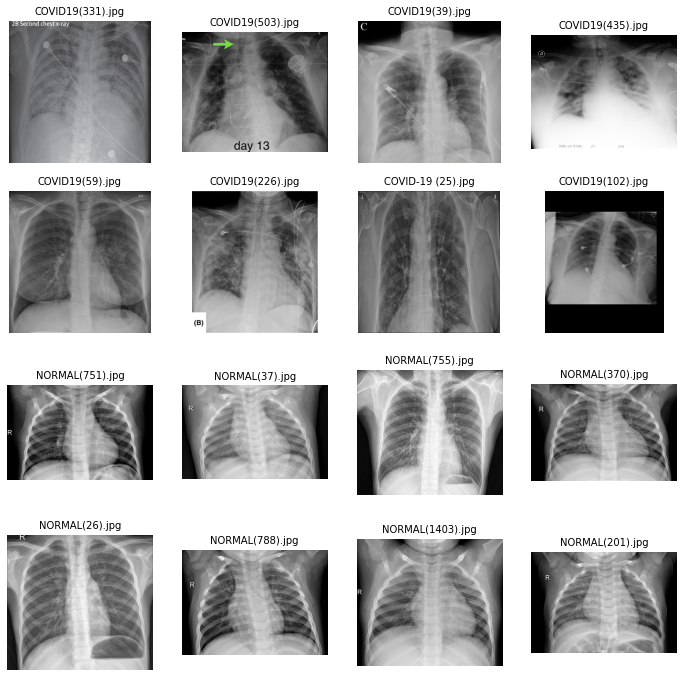

In [8]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic=[os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list=covid_pic+normal_pic
for i,img_path in enumerate(merged_list):
  data=img_path.split('/',6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [12]:
# generate training,testing and validation batches 
dgen_train=ImageDataGenerator(rescale=1./255,
                              validation_split=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

#train
train_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='training',
                                               batch_size=32,
                                               class_mode='binary')

#validation
validation_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='validation',
                                               batch_size=32,
                                               class_mode='binary')
#test
test_generator=dgen_test.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [13]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [14]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [15]:
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# TASK 6 : Compile & Train the Model

In [16]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
46/46 [==============================] - 49s 1s/step - loss: 0.8660 - accuracy: 0.7322 - val_loss: 0.2410 - val_accuracy: 0.9282
Epoch 2/10
46/46 [==============================] - 49s 1s/step - loss: 0.2239 - accuracy: 0.9172 - val_loss: 0.1733 - val_accuracy: 0.9586
Epoch 3/10
46/46 [==============================] - 49s 1s/step - loss: 0.1591 - accuracy: 0.9400 - val_loss: 0.2041 - val_accuracy: 0.9448
Epoch 4/10
46/46 [==============================] - 49s 1s/step - loss: 0.1567 - accuracy: 0.9455 - val_loss: 0.1294 - val_accuracy: 0.9448
Epoch 5/10
46/46 [==============================] - 49s 1s/step - loss: 0.1567 - accuracy: 0.9455 - val_loss: 0.1630 - val_accuracy: 0.9586
Epoch 6/10
46/46 [==============================] - 49s 1s/step - loss: 0.1484 - accuracy: 0.9482 - val_loss: 0.1313 - val_accuracy: 0.9586
Epoch 7/10
46/46 [==============================] - 49s 1s/step - loss: 0.1182 - accuracy: 0.9662 - val_loss: 0.1241 - val_accuracy: 0.9613
Epoch 8/10
46/46 [==

# TASK 7 : Performance Evaluation

In [18]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

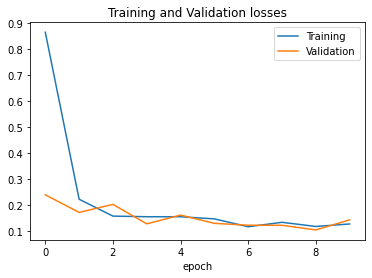

In [19]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

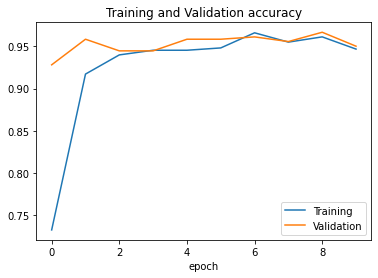

In [20]:
#plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')


In [21]:
# get the test accuracy and loss
test_loss,test_acc=model.evaluate(test_generator)
print('test loss :{} test acc :{}'.format(test_loss,test_acc))

16/16 [==============================] - 10s 637ms/step - loss: 0.1288 - accuracy: 0.9628
test loss :0.12883980572223663 test acc :0.9628099203109741


# TASK 8 : Prediction On New Data

In [22]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for filename in uploaded.keys():
  img_path='/content/'+filename
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(filename)
  
  if prediction==0:
    print('Covid detected')
  else:
    print('Covid not detected')

Saving covid1.jpg to covid1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving normal1.jpg to normal1.jpg
Saving normal2.jpg to normal2.jpg
covid1.jpg
Covid detected
covid2.jpeg
Covid detected
normal1.jpg
Covid not detected
normal2.jpg
Covid not detected
